**Day 4: Visualize categorical data with a bar chart**

What are we doing today? Today, we are looking at categorical data with a bar chart. We will explore the Aircraft Wildlife Strikes database.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../input/database.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


That error looks a little scary, but it just means that there are some columns where the data types are mixed, which Pandas doesn't like. We could rewrite the read_csv command to either nix the warning or omit those columns, but let's ignore it for now and see what our columns actually are.

In [4]:
print(list(data))

['Record ID', 'Incident Year', 'Incident Month', 'Incident Day', 'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make', 'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model', 'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position', 'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport', 'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility', 'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID', 'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities', 'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage', 'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage', 'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage', 'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage', 'Engine Ingested', 'Propeller Strike', 'Propeller Damage', 'Wing or Rotor Strike', 'Wing or Rotor Damage', 'Fuselage Strike', 'Fuselage Damage', 'Landing Gear Strike', 'Landing Gear Da

The columns with mixed data types are "Aircraft Model,"  "Engine Model," "Engine1 Position," and "Engine3 Position." If we were going to work with those columns, I would investigate further, but we're not. 

Instead, let's pull out the column we *are* going to use: "Species Name," and take a look at the values and counts in that column.

In [30]:
species = data["Species Name"]
print(species.value_counts())

UNKNOWN MEDIUM BIRD          38531
UNKNOWN SMALL BIRD           32981
MOURNING DOVE                 7653
GULL                          6580
UNKNOWN BIRD                  6400
KILLDEER                      4562
AMERICAN KESTREL              4476
BARN SWALLOW                  4215
HORNED LARK                   3952
EUROPEAN STARLING             3915
SPARROW                       3152
ROCK PIGEON                   2893
UNKNOWN LARGE BIRD            2789
RED-TAILED HAWK               2254
EASTERN MEADOWLARK            1829
CANADA GOOSE                  1574
RING-BILLED GULL              1531
CLIFF SWALLOW                 1485
HAWK                          1313
BLACKBIRD                     1281
HERRING GULL                  1199
BARN OWL                      1118
WESTERN MEADOWLARK            1072
SWALLOW                       1053
DOVE                          1041
WHITE-TAILED DEER             1021
AMERICAN ROBIN                 957
PACIFIC GOLDEN-PLOVER          909
MALLARD             

A few things are clear: three of the five highest counts belong to some variation of "unknown" (and a fourth, "unknown large bird," appears not much further down); and there are many, many very specific species that only have a count of 1. 

For the sake of making a nice and informative bar graph, we're going to chop this up a little. Let's look at only the top five known species. 

In [37]:
top_five = ["MOURNING DOVE", "GULL", "KILLDEER", "AMERICAN KESTREL", "BARN SWALLOW"] #Our top known five, based on the list above. 
top_five_species = species[species.isin(top_five)] #isin() returns a Boolean array, which we check our original Series (species) against to create a new Series.
print(top_five_species.value_counts()) #The new column has the same values and counts as the top five known species in the old column.

MOURNING DOVE       7653
GULL                6580
KILLDEER            4562
AMERICAN KESTREL    4476
BARN SWALLOW        4215
Name: Species Name, dtype: int64


Let's try a count plot!

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

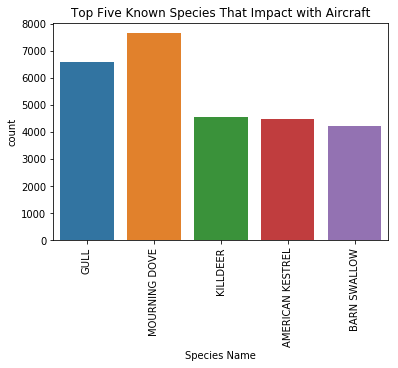

In [42]:
species_count = sns.countplot(top_five_species) #A countplot() is a type of bar plot specifically for value counts.
plt.title("Top Five Known Species That Impact with Aircraft") #That's kind of a morbid title, isn't it?
plt.xticks(rotation='vertical') #This rotates our x-axis labels so they don't smush together. 